<a href="https://colab.research.google.com/github/l-guilherme/IA/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
data = pd.read_csv("train.csv")
data. describe#.dtypes

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [7]:
y = data['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [8]:
X = data.drop('Survived', axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
for column in X.columns:
  print(f"{column:<12} {len(set(X[column])):4} {X[column].dtypes}")

PassengerId   891 int64
Pclass          3 int64
Name          891 object
Sex             2 object
Age           265 float64
SibSp           7 int64
Parch           7 int64
Ticket        681 object
Fare          248 float64
Cabin         148 object
Embarked        4 object


In [40]:
indesejadas = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
Xdrop = X.drop(indesejadas, axis=1)
Xdrop#.columns

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [48]:
Xnum = Xdrop.select_dtypes('number')
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [42]:
for column in Xnum.columns:
  print(f"{column:>12} {sum(Xnum[column].isnull())}")

      Pclass 0
         Age 177
       SibSp 0
       Parch 0
        Fare 0


In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
XnumLimpo = imputer.fit_transform(Xnum)
XnumLimpo

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [47]:
Xcat = Xdrop.select_dtypes('object')
Xcat.columns

Index(['Sex'], dtype='object')

In [45]:
for column in Xcat.columns:
  print(f"{column:>12} {sum(Xcat[column].isnull())}")

         Sex 0


In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
XcatLimpo = imputer.fit_transform(Xcat)
XcatLimpo

array([['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['ma

In [49]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
XcatHot = encoder.fit_transform(XcatLimpo)
XcatHot

<891x2 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [50]:
XcatHot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [51]:
import numpy as np
Xtratado = np.c_[XnumLimpo, XcatHot.toarray()]
Xtratado.shape

(891, 7)

In [52]:
Xtratado

array([[ 3.    , 22.    ,  1.    , ...,  7.25  ,  0.    ,  1.    ],
       [ 1.    , 38.    ,  1.    , ..., 71.2833,  1.    ,  0.    ],
       [ 3.    , 26.    ,  0.    , ...,  7.925 ,  1.    ,  0.    ],
       ...,
       [ 3.    , 28.    ,  1.    , ..., 23.45  ,  1.    ,  0.    ],
       [ 1.    , 26.    ,  0.    , ..., 30.    ,  0.    ,  1.    ],
       [ 3.    , 32.    ,  0.    , ...,  7.75  ,  0.    ,  1.    ]])

In [53]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.columns.isin(test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [54]:
train.columns[~train.columns.isin(test.columns)]

Index(['Survived'], dtype='object')

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosDesejados(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasIndesejadas_ = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
    return self
  def transform(self, X, y=None):
    return X.drop(self.colunasIndesejadas_, axis=1)

atributosDesejados = AtributosDesejados()
Xdrop = atributosDesejados.fit_transform(X)
Xdrop#.columns

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosNumericos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasNumericas = X.select_dtypes(include='number').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasNumericas]

atributosNumericos = AtributosNumericos()
Xnum = atributosNumericos.fit_transform(Xdrop)
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipenum = Pipeline([
    ('atributos_numericos', AtributosNumericos()),
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

XnumLimpo = pipenum.fit_transform(Xdrop)
XnumLimpo

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosCategoricos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.colunasCategoricas = X.select_dtypes(include='object').columns
    return self
  def transform(self, X, y=None):
    return X[self.colunasCategoricas]

atributosCategoricos = AtributosCategoricos()
Xcat = atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex'], dtype='object')

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

pipecat = Pipeline([
    ('atributos_categoricos', AtributosCategoricos()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [60]:
from sklearn.pipeline import FeatureUnion

unecaracteristicas = FeatureUnion([
    ('pipenum', pipenum),
    ('pipecat', pipecat)
])

Xtratado = unecaracteristicas.fit_transform(Xdrop)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ..., -0.50244517,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.78684529,
         1.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ..., -0.48885426,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -0.17626324,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ..., -0.04438104,
         0.        ,  1.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ..., -0.49237783,
         0.        ,  1.        ]])

In [61]:
from sklearn.pipeline import Pipeline

preproc = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('unecaracteristicas', unecaracteristicas)
])

Xtratado = preproc.fit_transform(X)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ..., -0.50244517,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  0.78684529,
         1.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ..., -0.48885426,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -0.17626324,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ..., -0.04438104,
         0.        ,  1.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ..., -0.49237783,
         0.        ,  1.        ]])

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipetotal = Pipeline([
    ('preproc', preproc),
    ('arvore', DecisionTreeClassifier())
])

pipetotal.fit(X, y)
ypred = pipetotal.predict(X)
accuracy_score(y, ypred)

0.9797979797979798

In [63]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.01747704, 0.01455092, 0.02087903, 0.01355386, 0.01362443]),
  'score_time': array([0.00713277, 0.00648379, 0.00697446, 0.0062499 , 0.006387  ]),
  'test_score': array([0.73743017, 0.78089888, 0.80337079, 0.74157303, 0.82022472])},
 0.7766995166656205)

In [65]:
pipetotal.fit(X, y)
ypred = pipetotal.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('guilherme_submission.csv', index=False)

In [66]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [None, 1, 3, 5, 7, 9],
    'preproc__unecaracteristicas__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent']
}

modelo = GridSearchCV(pipetotal, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([2.32637811, 1.87953448, 1.87307787, 1.88958597, 1.86483502]),
  'score_time': array([0.00725579, 0.00667787, 0.00651407, 0.00680137, 0.00669694]),
  'test_score': array([0.81564246, 0.82022472, 0.81460674, 0.78651685, 0.85393258])},
 0.8181846713953927)

In [67]:
modelo.fit(X, y)
modelo.best_estimator_

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('atributos_desejados', AtributosDesejados()),
                                 ('unecaracteristicas',
                                  FeatureUnion(transformer_list=[('pipenum',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosNumericos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('scaler',
                                                                                   StandardScaler())])),
                                                                 ('pipecat',
                                                                  Pipeline(steps=[('atributos_categoricos',
                                                                                   AtributosCategoricos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder())]))]))])),
                ('arvore', DecisionTreeClassifier(max_depth=5))])

In [68]:
submission = pd.read_csv('gender_submission.csv')
ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('guilherme_gscv_submission.csv', index=False)

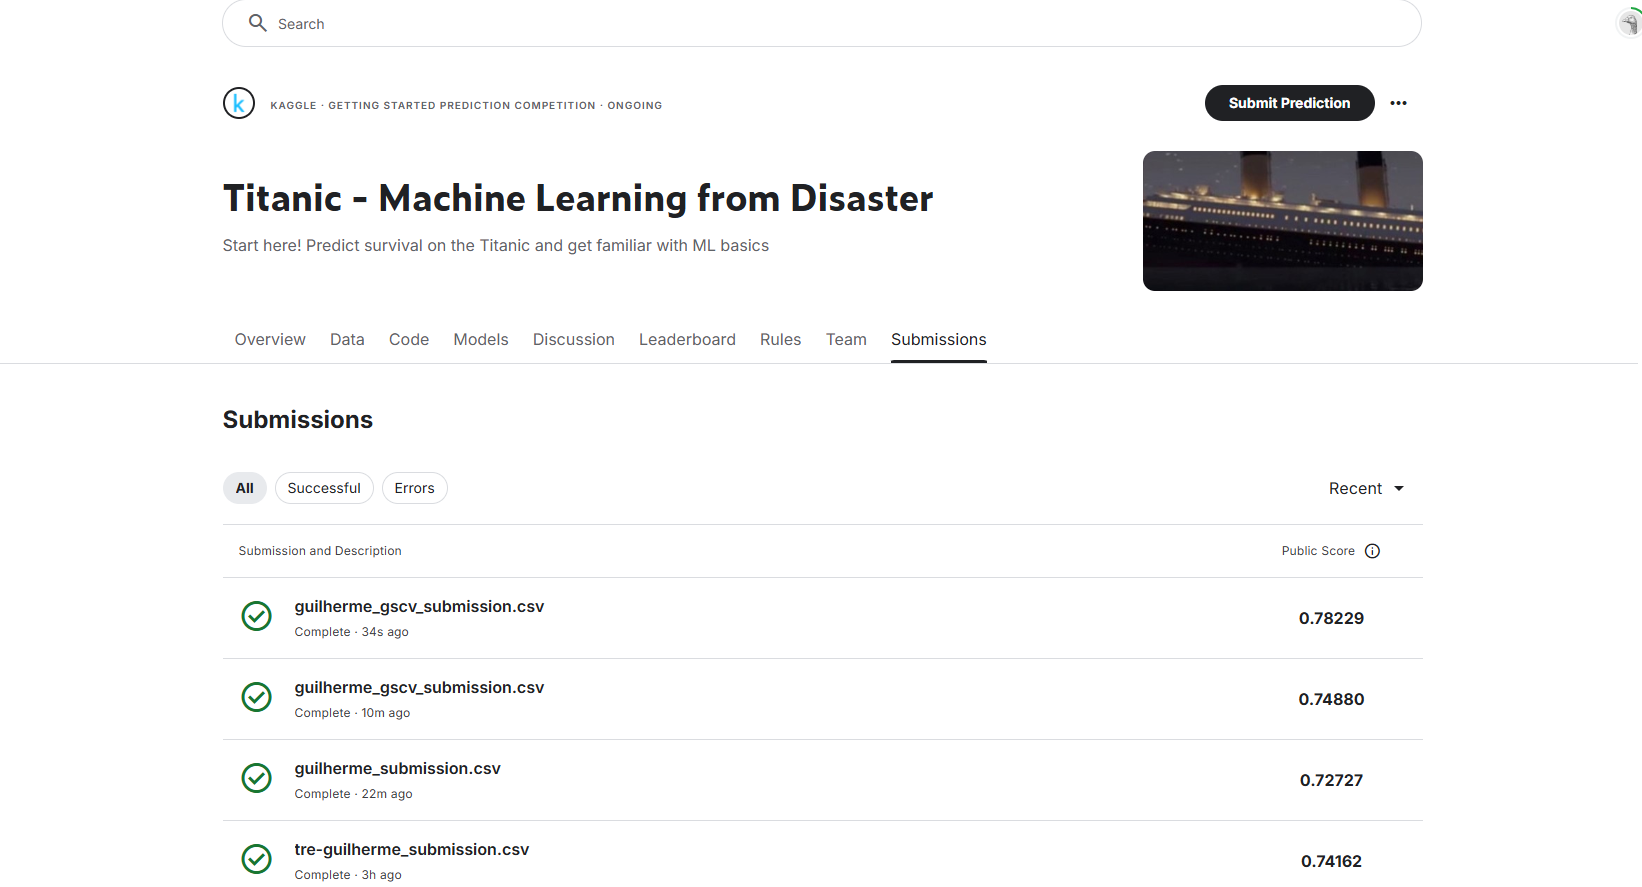